# IPL 2025 Batter Performance Analysis
Tools: Python(Jupyter Notebook),pandas,matplotlib,seaborn 
# Objective:
To analyze the batting performance in IPL 2025 of players and extract insights to help fantasy team decisions.

Step 1: Load the Dataset of IPL 2025
- The dataset is containing of player-wise batting statistics from IPL 2025
- Will clean and prepare it for analysis.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("IPL2025Batters.csv")
df

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Khaleel Ahmed,CSK,1,14,2,2,1*,-,2,50.00,0,0,0,0
152,Mohit Sharma,DC,1,8,2,1,1*,1.00,3,33.33,0,0,0,0
153,Donovan Ferreira,DC,1,1,1,0,1,1.00,3,33.33,0,0,0,0
154,Digvesh Singh,LSG,1,13,2,1,1,1.00,3,33.33,0,0,0,0


Step 2: Data Cleaning
- Renaming the Columns.
- Converting the datatypes of Avg and Strike rate to numeric.
- Removing the asterisks (*) from the Highscore Column.

In [38]:
df.info()
df.isnull().sum()

df.columns = ['Player', 'Team', 'Runs', 'Matches', 'Inn', 'Batting position', 'HS', 'AVG', 'BF', 'SR', '100s', '50s', '4s', '6s']

df['AVG'] = pd.to_numeric(df['AVG'], errors='coerce')
df['SR'] = pd.to_numeric(df['SR'], errors='coerce')
df['HS'] = df['HS'].astype(str).str.replace('*','',regex=False).astype(float)  # handle "*" in HS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  156 non-null    object 
 1   Team         156 non-null    object 
 2   Runs         156 non-null    int64  
 3   Matches      156 non-null    int64  
 4   Inn          156 non-null    int64  
 5   No           156 non-null    int64  
 6   HS           156 non-null    object 
 7   AVG          156 non-null    object 
 8   BF           156 non-null    int64  
 9   SR           156 non-null    float64
 10  100s         156 non-null    int64  
 11  50s          156 non-null    int64  
 12  4s           156 non-null    int64  
 13  6s           156 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 17.2+ KB


Step 3: Exploratory Data Analysis (EDA)

In [39]:
df.describe()

,Runs,Matches,Inn,Batting position,HS,AVG,BF,SR,100s,50s,4s,6s
count,156.000000,156.000000,156.000000,156.000000,156.000000,141.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,161.320513,9.865385,7.153846,1.634615,40.737179,23.087234,105.673077,134.394103,0.057692,0.916667,14.391026,8.294872
std,180.352772,4.757455,4.810142,1.658163,33.637750,15.094148,112.191838,57.237148,0.233912,1.590124,17.778774,9.515500
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000
25%,10.750000,6.000000,2.750000,0.000000,8.000000,9.400000,12.000000,100.000000,0.000000,0.000000,1.000000,0.000000
50%,93.500000,11.000000,6.000000,1.000000,37.000000,23.300000,63.500000,140.005000,0.000000,0.000000,7.000000,4.000000
75%,254.250000,14.000000,12.000000,3.000000,65.000000,32.750000,164.750000,162.707500,0.000000,1.000000,23.000000,14.000000
max,759.000000,17.000000,17.000000,7.000000,141.000000,65.180000,486.000000,400.000000,1.000000,8.000000,88.000000,40.000000


Top 10 Runscorer of the IPL 2025
- Displays the top 10 batters with the highest total runs in IPL 2025.

In [40]:
df.nlargest(10, 'Runs')[['Player', 'Runs']]

,Player,Runs
0,Sai Sudharsan,759
1,Surya Kumar Yadav,717
2,Virat Kohli,657
3,Shubman Gill,650
4,Mitchell Marsh,627
5,Shreyas Iyer,604
6,Yashasvi Jaiswal,559
7,Prabhsimran Singh,549
8,K L Rahul,539
9,Jos Buttler,538


Top 10 Strike raters
- Displaying the top 10 batters with highest Strike rates,players who played more than 5 Innings.

In [41]:
df[df['Inn'] >= 5].nlargest(10, 'SR')[['Player', 'SR']]


,Player,SR
39,Vaibhav Suryavanshi,206.55
10,Nicholas Pooran,196.25
14,Abhishek Sharma,193.39
43,Ayush Mhatre,188.97
61,Marcus Stoinis,186.04
56,Tim David,185.14
40,Naman Dhir,182.60
47,Dewald Brevis,180.00
65,Vipraj Nigam,179.74
12,Priyansh Arya,179.24


Centuries scored players in IPL 2025 

In [58]:
df[df['100s']>=1][['Player', '100s']]

,Player,100s
0,Sai Sudharsan,1
4,Mitchell Marsh,1
8,K L Rahul,1
11,Heinrich Klaasen,1
12,Priyansh Arya,1
14,Abhishek Sharma,1
23,Ishan Kishan,1
36,Rishabh Pant,1
39,Vaibhav Suryavanshi,1


Top 10 players with maximum Fifties
- Displays the top 10 batters with maximum fifties in IPL 2025.

In [43]:
df.nlargest(10, '50s')[['Player', '50s']]

,Player,50s
2,Virat Kohli,8
0,Sai Sudharsan,6
3,Shubman Gill,6
4,Mitchell Marsh,6
5,Shreyas Iyer,6
6,Yashasvi Jaiswal,6
1,Surya Kumar Yadav,5
9,Jos Buttler,5
10,Nicholas Pooran,5
13,Aiden Markram,5


Top 10 Players with 6s
- Displays the top 10 batters with the maximum 6s in IPL 2025.

In [44]:
df.nlargest(10, '6s')[['Player','6s']]

,Player,6s
10,Nicholas Pooran,40
5,Shreyas Iyer,39
1,Surya Kumar Yadav,38
4,Mitchell Marsh,37
7,Prabhsimran Singh,30
6,Yashasvi Jaiswal,28
14,Abhishek Sharma,28
17,Riyan Parag,27
11,Heinrich Klaasen,25
12,Priyansh Arya,25


Top 10 Players with 4s
- Displays the top 10 batters with the maximum 4s in IPL 2025.

In [45]:
df.nlargest(10, '4s')[['Player','4s']]

,Player,4s
0,Sai Sudharsan,88
1,Surya Kumar Yadav,69
2,Virat Kohli,66
3,Shubman Gill,62
6,Yashasvi Jaiswal,60
4,Mitchell Marsh,56
7,Prabhsimran Singh,56
12,Priyansh Arya,55
8,K L Rahul,52
9,Jos Buttler,52


Step 4: Visualization
- Team wise Average Strike Rate.
- PBKS has the most aggressive batting unit.

<Axes: title={'center': 'Average Strike Rate by Team'}, xlabel='Team'>

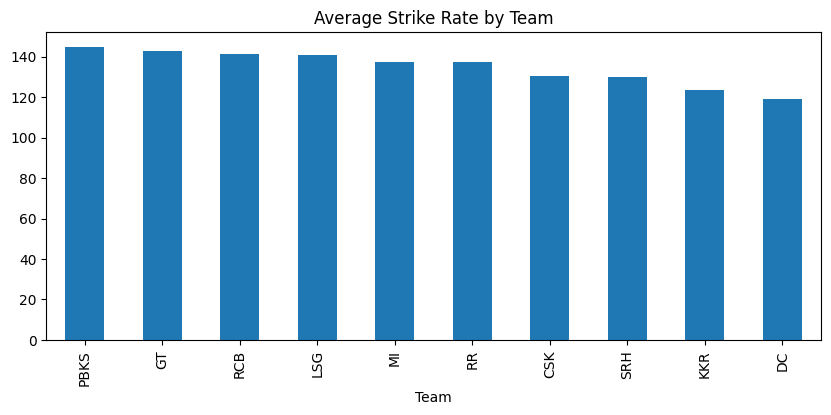

In [46]:
team_sr = df.groupby('Team')['SR'].mean().sort_values(ascending=False)
team_sr.plot(kind='bar', figsize=(10,4), title='Average Strike Rate by Team')

Scatter plot with Runs vs Strike Rate

Text(0.5, 1.0, 'Runs vs Strike Rate')

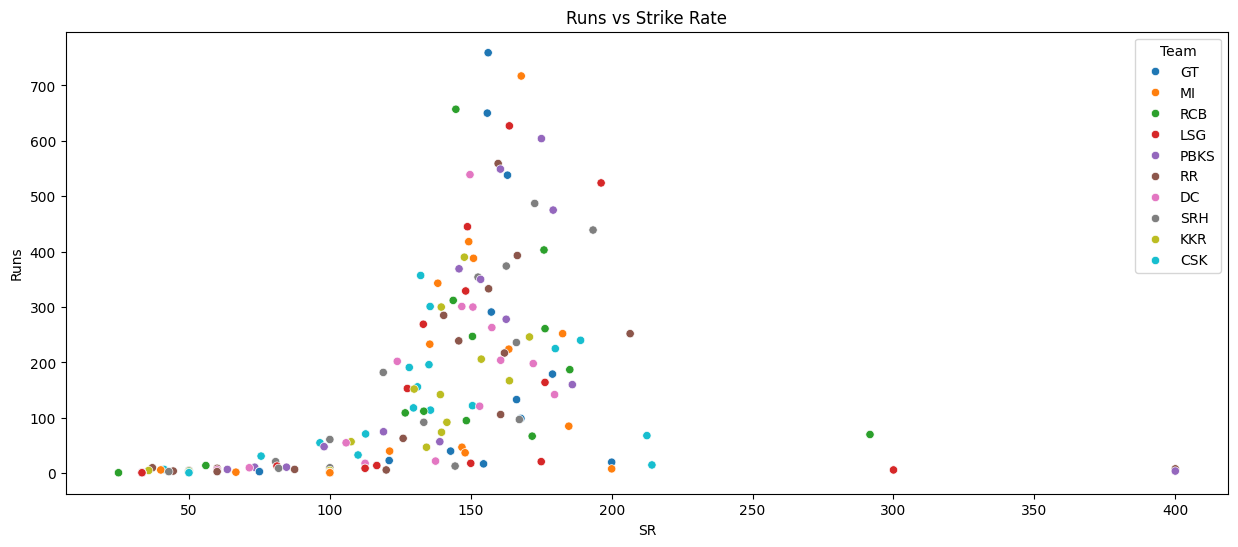

In [47]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x='SR', y='Runs', hue='Team')
plt.title('Runs vs Strike Rate')

 Horizontal Bar graph with Top 10 Run Scorers

C:\Users\hanis\AppData\Local\Temp\ipykernel_896\3321405736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_runs,x='Runs', y='Player',  palette='magma')


Text(0.5, 1.0, 'Top 10 Run Scorers')

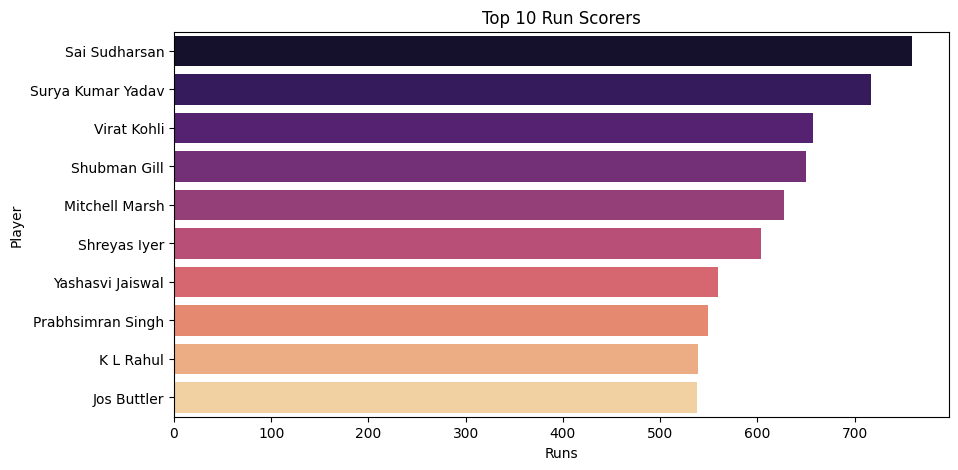

In [48]:
top_runs = df.nlargest(10, 'Runs')
plt.figure(figsize=(10,5))
sns.barplot(data=top_runs,x='Runs', y='Player',  palette='magma')
plt.title('Top 10 Run Scorers')

Horizontal bar graph of Top 20 players with maximum fifties

C:\Users\hanis\AppData\Local\Temp\ipykernel_896\4165678353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='50s', y='Player', data=top_six_hitters, palette='viridis')


Text(0.5, 1.0, 'Top 20 Players with Most 50s')

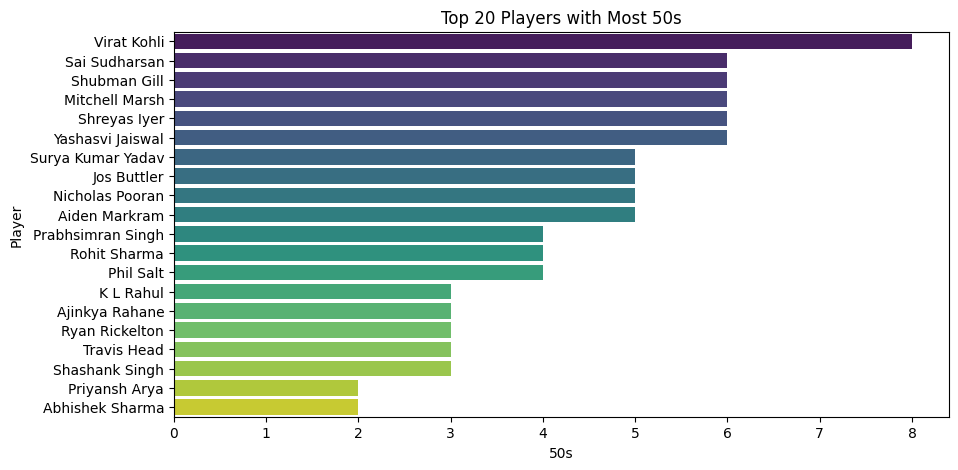

In [49]:
top_six_hitters = df.nlargest(20, '50s')
plt.figure(figsize=(10,5))
sns.barplot(x='50s', y='Player', data=top_six_hitters, palette='viridis')
plt.title('Top 20 Players with Most 50s')

Batting Positioning impact
- Line chart(Batting position VS Average Score)

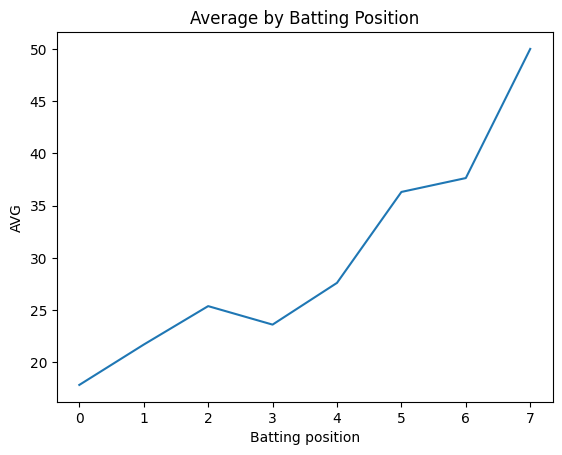

In [50]:
position_avg = df.groupby('Batting position')['AVG'].mean().reset_index()
sns.lineplot(data=position_avg, x='Batting position', y='AVG')
plt.title('Average by Batting Position')
plt.show()


Step 5: Key Insights
- Surya Kumar Yadav is the highest run scorer having Boundary Percentage Greater than 70
- Nicholas Pooran has 500+ runs with 80% of runs from boundaries

In [51]:
df['BoundaryPercentage'] = ((df['4s']*4 + df['6s']*6) / df['Runs']) * 100

high_boundary = df[df['BoundaryPercentage'] > 70]

print("Players with more than 70% of runs from boundaries:")
print(high_boundary[['Player', 'Runs','AVG','4s', '6s', 'BoundaryPercentage']])

Players with more than 70% of runs from boundaries:
                   Player  Runs    AVG  4s  6s  BoundaryPercentage
1       Surya Kumar Yadav   717  65.18  69  38           70.292887
4          Mitchell Marsh   627  48.23  56  37           71.132376
6        Yashasvi Jaiswal   559  43.00  60  28           72.987478
7       Prabhsimran Singh   549  32.29  56  30           73.588342
10        Nicholas Pooran   524  43.67  45  40           80.152672
12          Priyansh Arya   475  27.94  55  25           77.894737
14        Abhishek Sharma   439  33.77  46  28           80.182232
15           Rohit Sharma   418  29.86  41  22           70.813397
16              Phil Salt   403  33.58  48  22           80.397022
19         Ryan Rickelton   388  29.85  47  17           74.742268
20            Travis Head   374  31.17  50  15           77.540107
35            Josh Inglis   278  30.89  26  16           71.942446
38          Jitesh Sharma   261  37.29  24  17           75.862069
39    Vaib

- Import ipywidgets to get dropdown
- Dropdown by teams 

In [52]:
import ipywidgets as widgets
from IPython.display import display

team_dropdown = widgets.Dropdown(
    options=df['Team'].unique(),
    description='Team:',
    disabled=False,
)

def filter_by_team(team):
    display(df[df['Team'] == team][['Player', 'Runs', 'AVG', 'SR']].sort_values(by='Runs', ascending=False))

widgets.interact(filter_by_team, team=team_dropdown);


interactive(children=(Dropdown(description='Team:', options=('GT', 'MI', 'RCB', 'LSG', 'PBKS', 'RR', 'DC', 'SR…

- Filter players by maximum runs and good Strike rate.
- Top players with 400+ runs and 140+ SR.

In [53]:
filtered = df[(df['Runs'] > 300) & (df['SR'] > 140)]
filtered[['Player', 'Team', 'Runs', 'SR']]

def filter_players(min_runs=200, min_sr=130):
    return df[(df['Runs'] > min_runs) & (df['SR'] > min_sr)][['Player', 'Team', 'Runs', 'SR']]

filter_players(400, 140)

,Player,Team,Runs,SR
0,Sai Sudharsan,GT,759,156.17
1,Surya Kumar Yadav,MI,717,167.91
2,Virat Kohli,RCB,657,144.71
3,Shubman Gill,GT,650,155.87
4,Mitchell Marsh,LSG,627,163.70
5,Shreyas Iyer,PBKS,604,175.07
6,Yashasvi Jaiswal,RR,559,159.71
7,Prabhsimran Singh,PBKS,549,160.52
8,K L Rahul,DC,539,149.72
9,Jos Buttler,GT,538,163.03


Conclusion:
- This Anlysis reveals the IPL 2025 batters performance.
- Helps to take decisions for fantacy players